# StreetEasy

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem. It has the following columns:

- rental_id: rental ID
- rent: price of rent in dollars
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- size_sqft: size in square feet
- min_to_subway: distance from subway station in minutes
- floor: floor number
- building_age_yrs: building’s age in years
- no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
- has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
- has_washer_dryer: does it have washer/dryer in unit? (0/1)
- has_doorman: does it have a doorman? (0/1)
- has_elevator: does it have an elevator? (0/1)
- has_dishwasher: does it have a dishwasher (0/1)
- has_patio: does it have a patio? (0/1)
- has_gym: does the building have a gym? (0/1)
- neighborhood: (ex: Greenpoint)
- borough: (ex: Brooklyn)

In [72]:
import pandas as pd
import numpy as np

Starting by reading the file

In [73]:
df=pd.read_csv('brooklyn.csv')

In [74]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


In [75]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 
        'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 
        'has_patio', 'has_gym']]
 
y = df[['rent']]

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=6)

In [80]:
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(810, 14)
(203, 14)
(810, 1)
(203, 1)


In [81]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_predict = mlr.predict(x_test)

Sonny's apartment: https://streeteasy.com/rental/2177438

In [82]:
sonny=df[df['rental_id']==7906]
sonny

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
58,7906,1650,1.0,1,620,1,1.0,90,0,0,0,0,0,0,0,0,Prospect Park South,Brooklyn


In [83]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
 
predict = mlr.predict(sonny_apartment)
 
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2059.95


c:\Users\chyij\OneDrive\Python_project\Biodiversity_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
import matplotlib.pyplot as plt

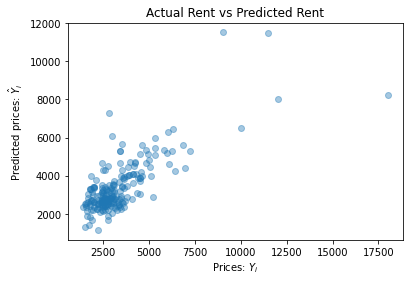

In [85]:
plt.scatter(y_test,y_predict, alpha=0.4)
 
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

Coefficients are most helpful in determining which independent variable carries more weight.

In [86]:
print(mlr.coef_)

[[-196.67177625  785.40073377    2.94579148  -37.78690683   13.01784892
    -4.10092423  123.089506     99.61520874  -14.55629062 -330.26816471
    85.07118067  -11.78666927  260.68383056  396.24793842]]


To see if there are any features that don't affect price linearly, let's graph the different features against rent.

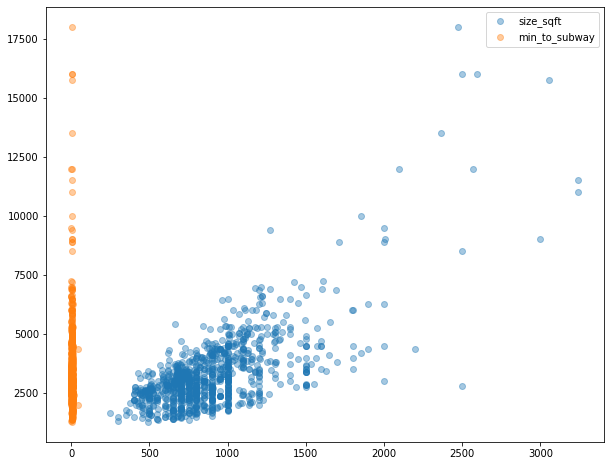

In [87]:
plt.figure(figsize=(10,8))
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.legend(['size_sqft','min_to_subway'])

## Evaluating the Model's Accuracy

In [88]:
print("Train score:")
print(mlr.score(x_train,y_train))

print("Test score:")
print(mlr.score(x_test,y_test))

Train score:
0.6132214537979526
Test score:
0.5843499238725713


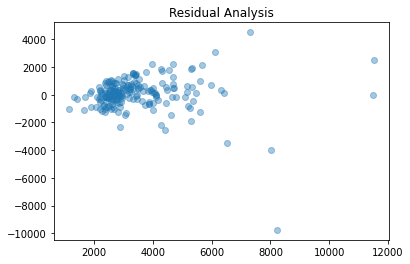

In [89]:
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()